### Questions

### Objectives
YWBAT 
- apply time series techniques to find insights on a dataset

### Outline
data found [here](https://data.world/data-society/global-climate-change-data/workspace/file?filename=GlobalLandTemperatures%2FGlobalTemperatures.csv)

- Take Questions
- Load in Data
- (20 min) Students will discuss data, transform it, condition it and find trends
- (25 min) Class will discuss any insights found

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load in dataset 
df = pd.read_csv("./data/GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


((3192, 9), None)

In [6]:
type(df["dt"][0])

str

In [7]:
### Transform data to time series
df["dt"] = pd.to_datetime(df["dt"])
display(df.head())
df.info()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null datetime64[ns]
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 224.6 KB


In [8]:
df.set_index(keys=['dt'], inplace=True)
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB


### Data is converted, let's build a plot
---------------------

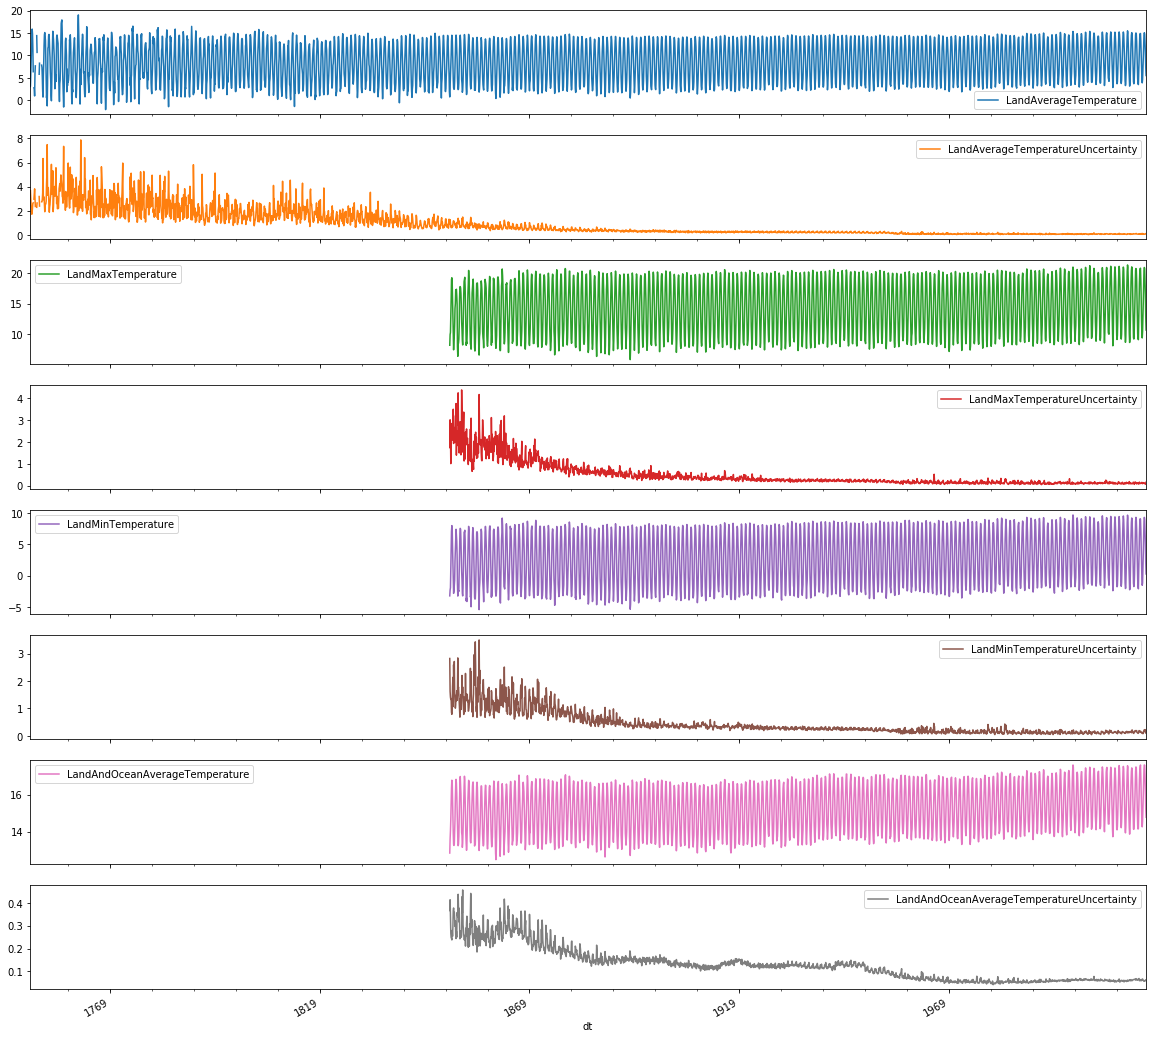

In [17]:
### make a basic plot of each column with time
df.plot(subplots=True, figsize=(20, 20))
plt.show()

In [20]:
### what insights can you find through time series analysis?
# Let's just investiage the past 50 years
df2 = df[df.index > '1969-12-31']
display(df2.head())

display(df2.info())

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1970-01-01,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052
1970-02-01,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053
1970-03-01,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,0.058
1970-04-01,8.603,0.066,14.383,0.179,2.739,0.113,15.440,0.051
1970-05-01,11.206,0.099,17.165,0.121,5.402,0.107,16.104,0.055


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 1970-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       552 non-null float64
LandAverageTemperatureUncertainty            552 non-null float64
LandMaxTemperature                           552 non-null float64
LandMaxTemperatureUncertainty                552 non-null float64
LandMinTemperature                           552 non-null float64
LandMinTemperatureUncertainty                552 non-null float64
LandAndOceanAverageTemperature               552 non-null float64
LandAndOceanAverageTemperatureUncertainty    552 non-null float64
dtypes: float64(8)
memory usage: 38.8 KB


None

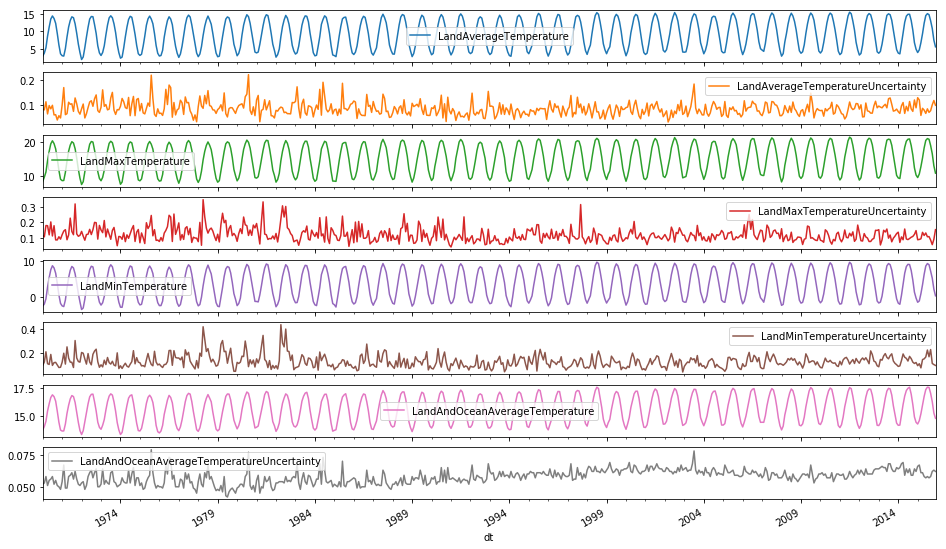

In [21]:
### Now let's plot it again
df2.plot(subplots=True, figsize=(16, 10))
plt.show()

### Okay, let's try and find some kind of correlation here


In [22]:
df2.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,9.128788,0.087043,14.823933,0.122397,3.518391,0.131946,15.575864,0.057906
std,4.151471,0.027095,4.263117,0.045466,4.032501,0.051693,1.235743,0.005561
min,1.882000,0.034000,7.392000,0.044000,-3.549000,0.045000,13.298000,0.042000
25%,4.997500,0.067750,10.636500,0.091000,-0.507500,0.095000,14.405000,0.054000
50%,9.347000,0.084000,15.127500,0.113000,3.678000,0.125000,15.590500,0.058000
75%,13.153250,0.101000,18.978500,0.145000,7.418000,0.157000,16.749000,0.062000
max,15.482000,0.221000,21.320000,0.344000,9.715000,0.433000,17.611000,0.079000


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
sd = seasonal_decompose(df2)

In [27]:
df2.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1970-01-01,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052
1970-02-01,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053
1970-03-01,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,0.058
1970-04-01,8.603,0.066,14.383,0.179,2.739,0.113,15.440,0.051
1970-05-01,11.206,0.099,17.165,0.121,5.402,0.107,16.104,0.055


In [30]:
5.272-2.836

2.4360000000000004

In [41]:
### is there a trend in temperature over time? 
diff_1 = df2.diff(periods=12)
diff_1.head()

# diff_1['LandAverageTemperature'].plot(figsize=(16, 10), subplots=True, style='r.')
# plt.show()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


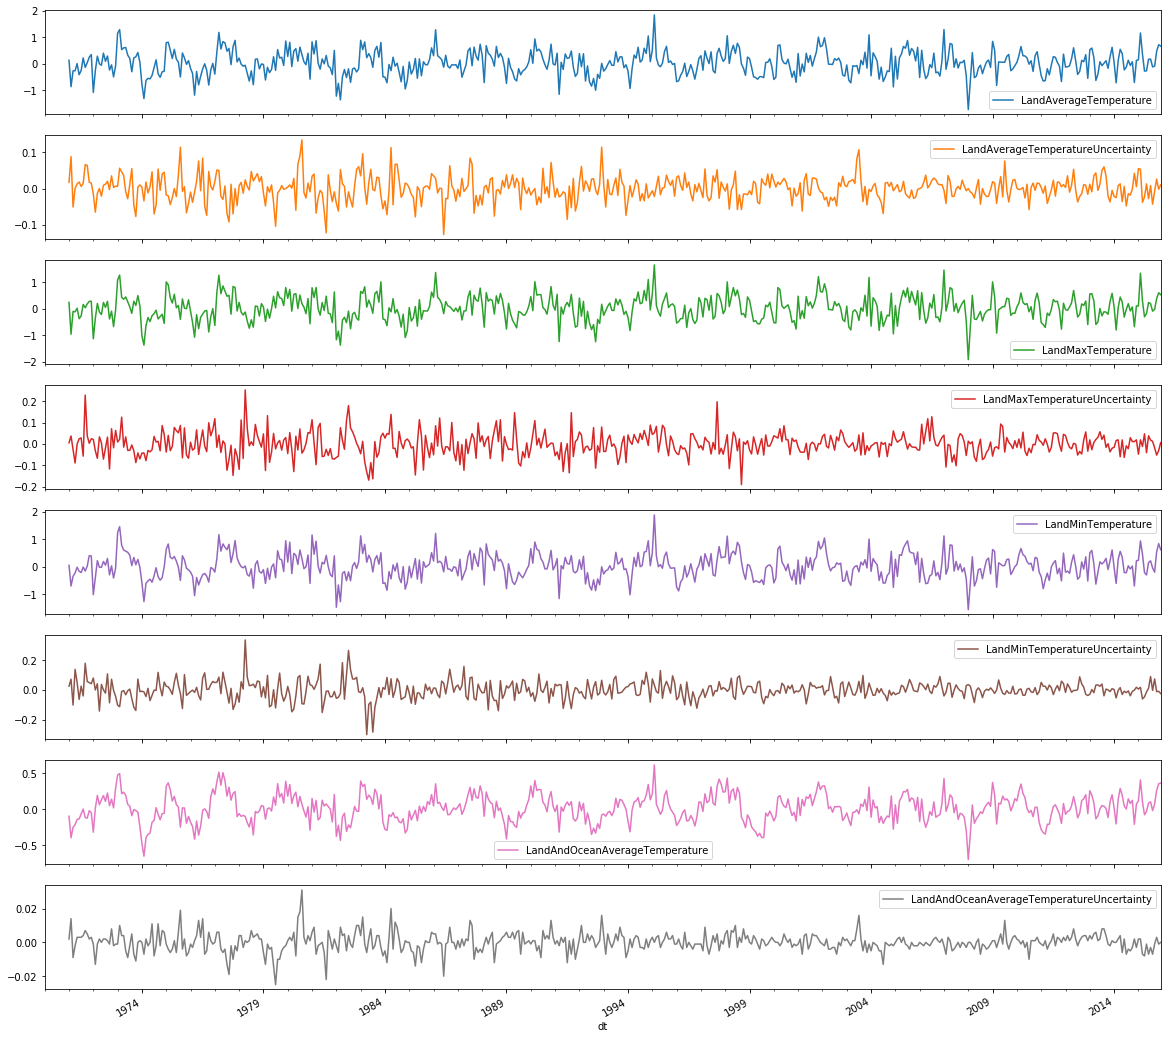

In [42]:
diff_1.plot(subplots=True, figsize=(20, 20))
plt.show()

In [53]:
df_annual = df.LandAverageTemperature.resample('A')
df_annual

In [62]:
df_annual_mean = df_annual.mean()
df_annual_mean.head()

dt
1750-12-31    8.719364
1751-12-31    7.976143
1752-12-31    5.779833
1753-12-31    8.388083
1754-12-31    8.469333
Freq: A-DEC, Name: LandAverageTemperature, dtype: float64

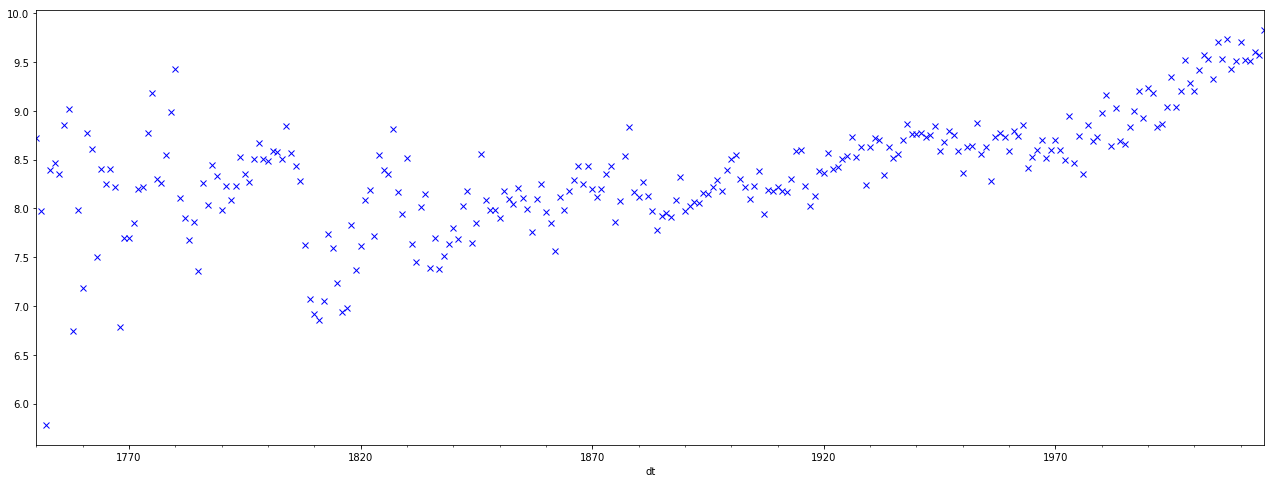

In [63]:
df_annual_mean.plot(figsize = (22,8), style='bx')

In [66]:
df_annual_mean.head()

dt
1750-12-31    8.719364
1751-12-31    7.976143
1752-12-31    5.779833
1753-12-31    8.388083
1754-12-31    8.469333
Freq: A-DEC, Name: LandAverageTemperature, dtype: float64

In [80]:
year_groups = df.groupby(pd.Grouper(freq ='A'))[['LandAverageTemperature']]

In [81]:
year_groups.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-01-01,3.881
2015-02-01,4.664
2015-03-01,6.740


In [118]:
land_temp_by_year = pd.DataFrame()

for index, group in enumerate(year_groups):
    dt_index, df_ = group  # unpacking group
    vals = df_[['LandAverageTemperature']].values.ravel()
    land_temp_by_year[dt_index.year] = vals

land_temp_by_year

,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3.034,2.495,0.348,2.039,1.574,1.067,3.887,-0.276,-1.503,5.014,...,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,3.083,0.963,NaN,0.715,-1.249,-0.108,5.666,3.704,0.806,4.082,...,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,5.626,5.800,5.806,5.424,3.677,3.607,4.192,4.529,3.765,4.520,...,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,8.490,7.670,8.265,8.272,11.610,9.263,10.042,8.246,7.210,5.983,...,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,11.573,NaN,NaN,12.186,11.936,12.881,14.164,13.039,9.715,10.189,...,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,12.937,13.827,NaN,14.585,14.388,15.380,14.547,17.115,13.139,13.512,...,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,15.868,NaN,NaN,15.092,14.681,14.397,13.906,17.610,13.847,12.526,...,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.750,14.405,NaN,14.148,13.556,13.515,13.437,17.910,11.818,14.587,...,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,11.413,10.673,NaN,13.322,11.129,11.773,12.652,14.852,10.028,12.626,...,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,6.367,NaN,7.839,8.962,9.582,9.970,7.312,6.482,1.894,8.267,...,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


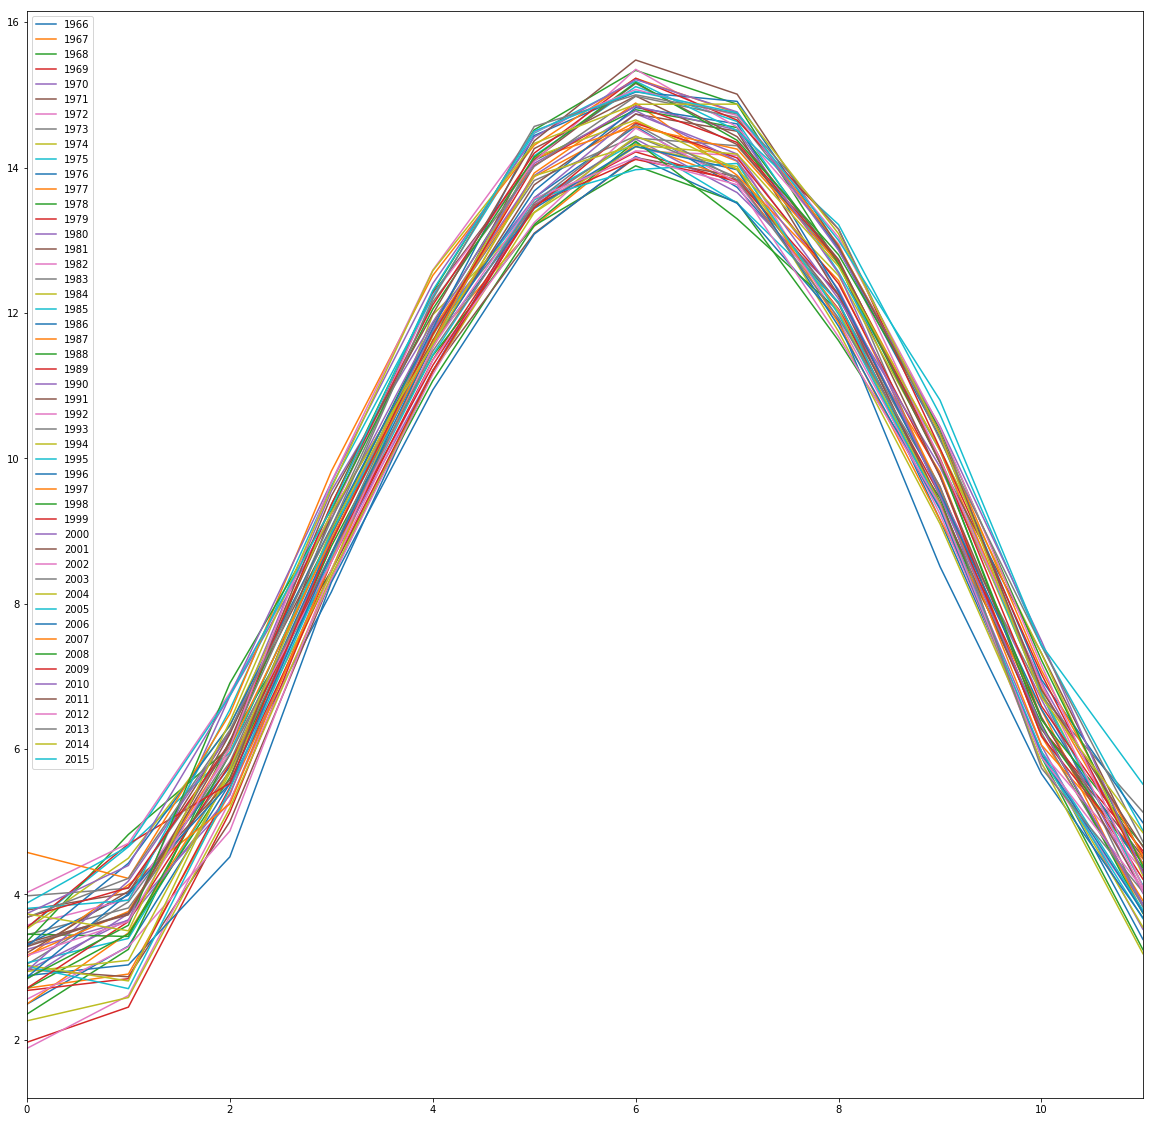

In [124]:
land_temp_by_year.iloc[:, -50:].plot(figsize=(20, 20))

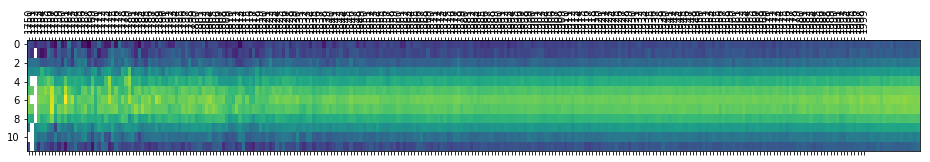

In [144]:
plt.matshow(land_temp_by_year, aspect='auto')
plt.xticks(range(250), land_temp_by_year.columns, rotation=90)
plt.show()

In [130]:
def plot_col_heatmap(column):
    year_temps = df[column].groupby(pd.Grouper(freq='A'))
    temp_annual = pd.DataFrame()
    for yr, group in year_temps:
        temp_annual[yr] = group.values.ravel()
    year_matrix = temp_annual.T


    plt.matshow(temp_annual, cmap=plt.cm.Spectral_r, aspect='auto', interpolation=None)
    # plt.yticks(ticks=range(len(temp_annual.index)), labels=temp_annual.index)
    #  plt.xticks(ticks=range(len(temp_annual.columns)), labels=temp_annual.columns, rotation=90)
    plt.show()

In [131]:
drop_cols = [col for col in df2.columns if 'Uncertainty' in col]
df2.drop(drop_cols, axis=1, inplace=True)

In [132]:
#What do we notice about the heatmap
# summer is more hot than winter

LandAverageTemperature


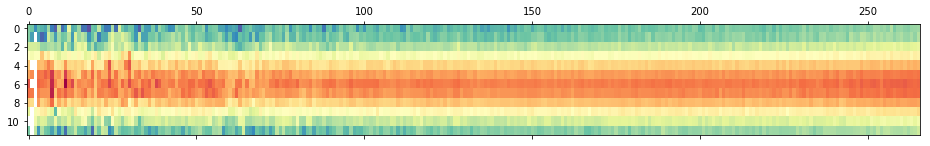




LandMaxTemperature


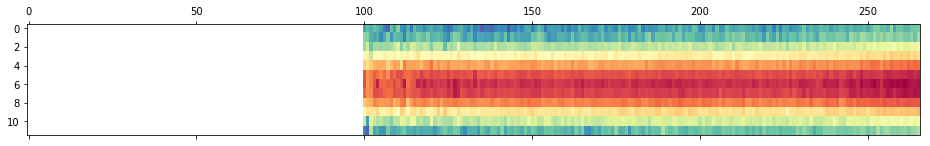




LandMinTemperature


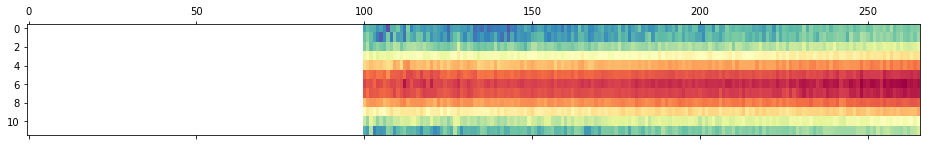




LandAndOceanAverageTemperature


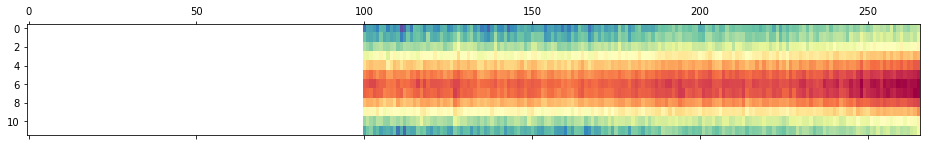

In [133]:
for column in df2.columns:
    print(column)
    plot_col_heatmap(column)
    print("\n\n")

LandAverageTemperature


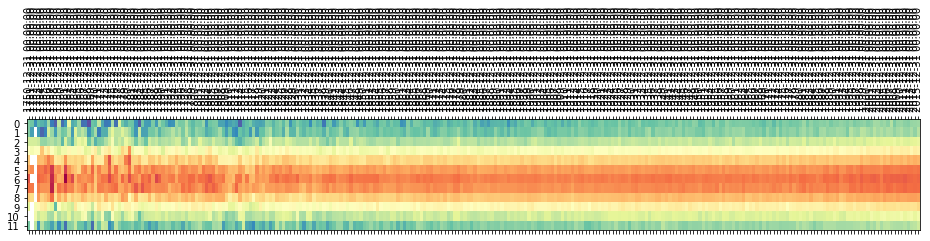




LandMaxTemperature


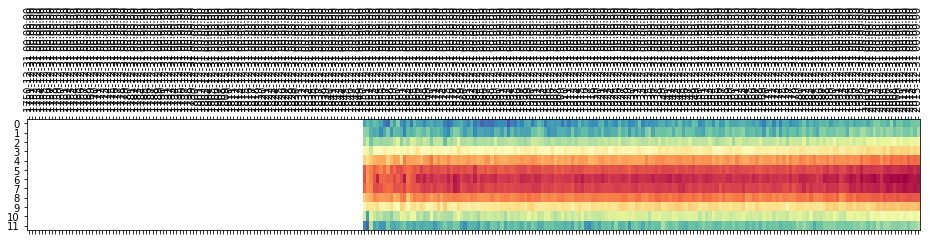




LandMinTemperature


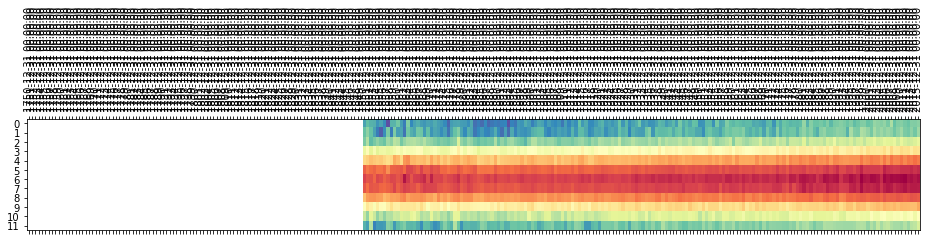




LandAndOceanAverageTemperature


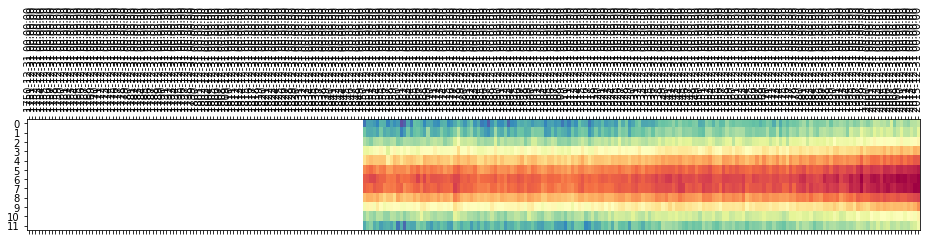

In [82]:
for column in df.drop(drop_cols, axis=1).columns:
    print(column)
    plot_col_heatmap(column)
    print("\n\n")

### Assessment
- Climate change is real
- Learned to utilize the heatmap to spot trends, Spectral_r
- Workflow: putting things together from lessons